# Import Libraries

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [2]:
import os
import random
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
from datasets import Dataset, DatasetDict

from sklearn.preprocessing import LabelEncoder

# **Atur Seed**
Supaya hasil konsisten

In [ ]:
def set_seed(seed=0):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  random.seed(seed)
  os.environ['TF_DETERMINISTIC_OPS'] = "1"
  os.environ['TF_CUDNN_DETERMINISM'] = "1"
  os.environ['PYTHONHASHSEED'] = str(seed)

SEED = 0
set_seed(SEED)

# Data Understanding

## Train & Validation Data

In [ ]:
df = pd.read_csv('tourist_reviews_final.csv')
display(df)

In [ ]:
df.info()

In [ ]:
na_rows = df[df['reviews_content'].isna()]

In [7]:
df['reviews_content'] = df['reviews_content'].fillna('This place is bad')

In [9]:
df.describe()

,reviews_content,category
count,2000,2000
unique,1996,2
top,Thanks for the visit,negative
freq,2,1000


In [10]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=SEED)

In [11]:
display(train_df)
display(train_df.describe())
display(train_df.info())

,reviews_content,category
582,"The place is nice, clean, comfortable",positive
159,Holidays are full of visitors. The view is goo...,positive
1827,"You ordered food from the canteen/kios, what's...",negative
318,It's great to walk in the morning while taking...,positive
708,Access to this place is very complicated becau...,negative
...,...,...
835,Always busy and cold. I like shopping there be...,positive
1216,What a fun photo spot,positive
1653,"Wow, highly recommended, suitable for enjoying...",positive
559,The flower garden is really beautiful 🤗🤗\nHope...,positive


,reviews_content,category
count,1600,1600
unique,1597,2
top,Thanks for your visit,negative
freq,2,801


<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 582 to 684
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews_content  1600 non-null   object
 1   category         1600 non-null   object
dtypes: object(2)
memory usage: 37.5+ KB


None

In [12]:
display(val_df)
display(val_df.describe())
display(val_df.info())

,reviews_content,category
405,"The best fishing spots for benteur, senggehek ...",negative
1190,Dominated by camp locations. There are many ty...,negative
1132,"The management is much better, as the rubbish ...",positive
731,"The location is very spacious, suitable for ev...",positive
1754,"The pine forest is nice, spacious, cool, nice ...",positive
...,...,...
638,"The place is natural,, good for photos,,",positive
360,Amazing,negative
1810,A cool and comfortable place... Good for playi...,positive
1743,The waterfall is still beautiful in the Lemban...,positive


,reviews_content,category
count,400,400
unique,400,2
top,"It's not comfortable, entry is 35 thousand fre...",positive
freq,1,201


<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 405 to 563
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews_content  400 non-null    object
 1   category         400 non-null    object
dtypes: object(2)
memory usage: 9.4+ KB


None

In [13]:
train_df.to_csv('train_02.csv', index=False)
val_df.to_csv('val_02.csv', index=False)

## Test Data

In [119]:
test_df = pd.read_csv('datatest_final.csv')
display(test_df)

,reviews_content
0,Watch the NAGARA conversion demonstration at t...
1,So I remember the material shown in the Geolog...
2,If you want to see these wood fossils directly...
3,Feel at home for a long time in the Bandung Ge...
4,The Bandung Geology Museum also has a rock gar...
...,...
616,The new face of the Ketandan Corridor Jln. RE....
617,The choice of location for the Kuto Besak fort...
618,Mas Dino's gas hahaha. Try Pempek Tince (many ...
619,IS IT POSSIBLE TO HANG OUT AT THE MARKET? It t...


## Train Val Test Data Distribution

In [120]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(1600, 3)
(400, 3)
(621, 1)


## Class Data Distribution

In [121]:
text_col = 'reviews_content'
target_col = 'category'

In [122]:
train_df[target_col].value_counts()

category
negative    801
positive    799
Name: count, dtype: int64

<Axes: xlabel='category'>

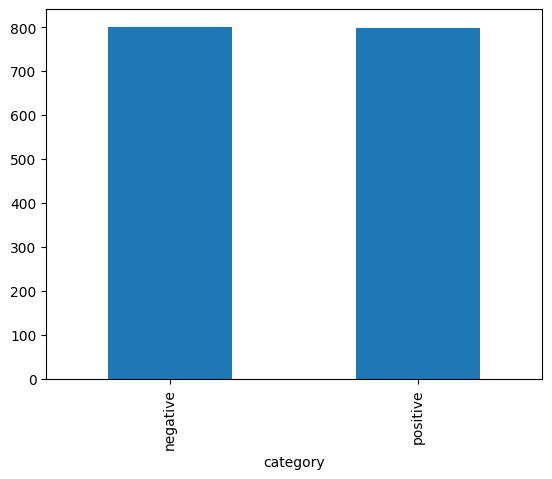

In [123]:
train_df.groupby(target_col).size().plot(kind='bar')

In [124]:
val_df[target_col].value_counts()

category
positive    201
negative    199
Name: count, dtype: int64

<Axes: xlabel='category'>

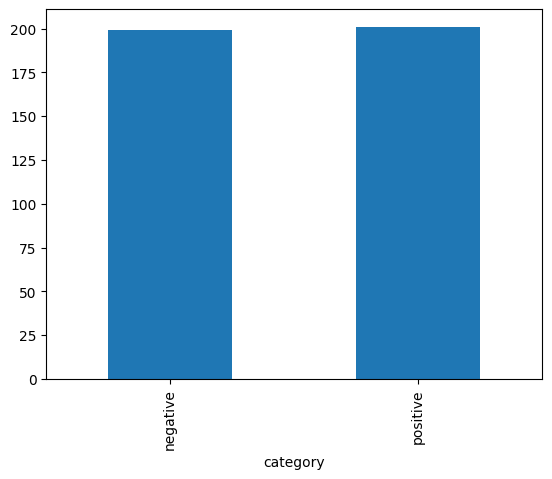

In [125]:
val_df.groupby(target_col).size().plot(kind='bar')

## Text Length in Train Val Test Set

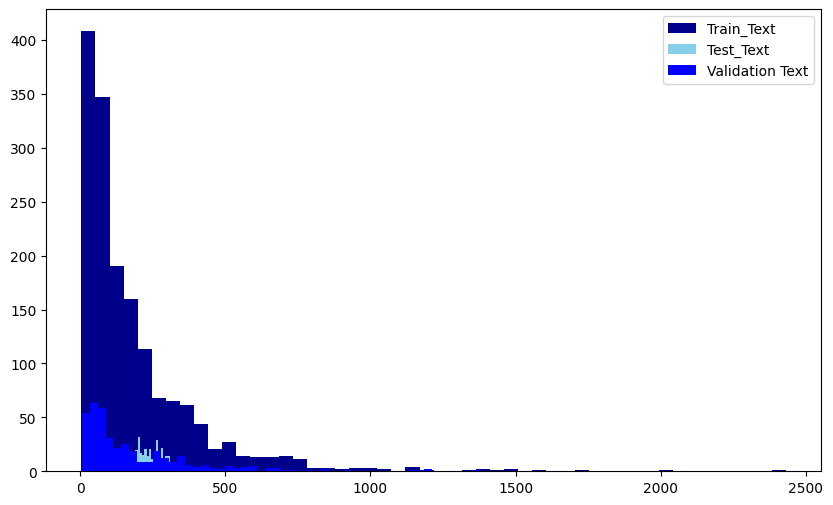

In [126]:
length_train = train_df[text_col].str.len()
length_val = val_df[text_col].str.len()
length_test = test_df[text_col].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="Train_Text", color = "darkblue")
plt.hist(length_test, bins=50, label='Test_Text', color = "skyblue")
plt.hist(length_val, bins=50, label="Validation Text", color = "blue")
plt.legend()

# BERT Modeling

## Download BERT Model

In [22]:
model = TFAutoModel.from_pretrained("roberta-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

## Label Encoding

In [127]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

enc_target_col = 'category_enc'

# Fit label encoder and return encoded labels for both training and validation sets
train_df[enc_target_col] = label_encoder.fit_transform(train_df[target_col])
val_df[enc_target_col] = label_encoder.fit_transform(val_df[target_col])

## Convert Dataset into DatasetDict

In [128]:
# Convert pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Create a DatasetDict
data_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

# Display the structure of DatasetDict
display(data_dict)

DatasetDict({
    train: Dataset({
        features: ['reviews_content', 'category', 'category_enc', '__index_level_0__'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['reviews_content', 'category', 'category_enc', '__index_level_0__'],
        num_rows: 400
    })
    test: Dataset({
        features: ['reviews_content'],
        num_rows: 621
    })
})

## Tokenization

In [129]:
tokenizer = AutoTokenizer.from_pretrained("roberta-large")

In [130]:
def tokenize(batch):
    return tokenizer(batch[text_col], padding=True, truncation=True)

In [131]:
data_dict_encoded = data_dict.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/621 [00:00<?, ? examples/s]

In [28]:
display(data_dict_encoded)

DatasetDict({
    train: Dataset({
        features: ['reviews_content', 'category', 'category_enc', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['reviews_content', 'category', 'category_enc', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    test: Dataset({
        features: ['reviews_content', 'input_ids', 'attention_mask'],
        num_rows: 5
    })
})

## Convert into TF Dataset Format

In [132]:
# Set format for train and validation datasets
data_dict_encoded['train'].set_format('tf', columns=['__index_level_0__', 'input_ids', 'attention_mask', enc_target_col])
data_dict_encoded['validation'].set_format('tf', columns=['__index_level_0__', 'input_ids', 'attention_mask', enc_target_col])

# Set format for the test dataset without the 'category_enc' column
data_dict_encoded['test'].set_format('tf', columns=['input_ids', 'attention_mask'])

In [133]:
# Define the order function to handle different dataset splits
def order(inp, include_labels=True):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels if included.
    '''
    data = {key: val for key, val in inp.items() if key in ['input_ids', 'attention_mask', 'token_type_ids']}
    if include_labels and 'category_enc' in inp:
        return data, inp['category_enc']
    return data

# Convert train and validation datasets to TensorFlow format
BATCH_SIZE = 8

In [134]:
train_dataset = tf.data.Dataset.from_tensor_slices(data_dict_encoded['train'][:])
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
train_dataset = train_dataset.map(lambda x: order(x, include_labels=True), num_parallel_calls=tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices(data_dict_encoded['validation'][:])
val_dataset = val_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.map(lambda x: order(x, include_labels=True), num_parallel_calls=tf.data.AUTOTUNE)

# Convert test dataset to TensorFlow format without labels
test_dataset = tf.data.Dataset.from_tensor_slices(data_dict_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

In [135]:
inp, out = next(iter(train_dataset)) # a batch from train_dataset
print(inp, '\n\n', out)

{'input_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[    0,  6460,  1227, ...,     1,     1,     1],
       [    0, 25101,  2721, ...,     1,     1,     1],
       [    0,   713,  8376, ...,     1,     1,     1],
       ...,
       [    0,  2709, 15866, ...,     1,     1,     1],
       [    0,   100,   348, ...,     1,     1,     1],
       [    0, 13987,    47, ...,     1,     1,     1]])>, 'attention_mask': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>} 

 tf.Tensor([0 1 0 1 0 1 1 0], shape=(8,), dtype=int64)


## Define Model

In [33]:
class BERTForClassification(tf.keras.Model):

    def __init__(self, bert_model, num_classes=2):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

# Instantiate the classifier with 2 classes
classifier = BERTForClassification(model, num_classes=2)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

## Callbacks

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               verbose=1,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=np.sqrt(0.1),
                              verbose=1,
                              patience=2,
                              min_lr=3e-9)

## Fit Model

In [35]:
# Include the validation dataset in the fit method
%%time
history = classifier.fit(
    train_dataset,
    epochs=4,
    verbose=2,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/4
200/200 - 364s - loss: 0.6537 - accuracy: 0.6219 - val_loss: 0.5767 - val_accuracy: 0.7025 - 364s/epoch - 2s/step
Epoch 2/4
200/200 - 178s - loss: 0.5582 - accuracy: 0.7412 - val_loss: 0.5355 - val_accuracy: 0.7375 - 178s/epoch - 892ms/step
Epoch 3/4
200/200 - 179s - loss: 0.4982 - accuracy: 0.7694 - val_loss: 0.5327 - val_accuracy: 0.7750 - 179s/epoch - 893ms/step
Epoch 4/4
200/200 - 178s - loss: 0.4352 - accuracy: 0.8125 - val_loss: 0.4743 - val_accuracy: 0.8075 - 178s/epoch - 892ms/step
CPU times: user 9min 56s, sys: 2min 32s, total: 12min 29s
Wall time: 14min 59s


## Predict

In [136]:
# Make predictions on the test dataset
predictions = classifier.predict(test_dataset)

# Convert probabilities to class labels
predicted_labels = (predictions > 0.5).astype(int)

# Display the predictions
print("Predictions:\n", predicted_labels.flatten())

# Display the prediction scores
print("Predictions:\n", predictions.flatten())

78/78 [==============================] - 6s 75ms/step
Predictions:
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1

In [137]:
# Decode the predicted labels back to original labels
decoded_labels = label_encoder.inverse_transform(predicted_labels)

# Display the original labels of the predictions
print("Predictions with original labels:\n", decoded_labels)

Predictions with original labels:
 ['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'neg

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Export

In [138]:
test_df.head()

,reviews_content
0,Watch the NAGARA conversion demonstration at t...
1,So I remember the material shown in the Geolog...
2,If you want to see these wood fossils directly...
3,Feel at home for a long time in the Bandung Ge...
4,The Bandung Geology Museum also has a rock gar...


In [139]:
# Create a DataFrame
results_df = pd.DataFrame({
    'Row': range(1, len(decoded_labels) + 1),  # Creating a sequence of numbers starting from 1
    'reviews_content' : test_df['reviews_content'],
    'score': predictions.flatten(),
    'Label': decoded_labels

})

# Display the DataFrame to verify its correctness
display(results_df)

,Row,reviews_content,score,Label
0,1,Watch the NAGARA conversion demonstration at t...,0.046339,negative
1,2,So I remember the material shown in the Geolog...,0.014293,negative
2,3,If you want to see these wood fossils directly...,0.120269,negative
3,4,Feel at home for a long time in the Bandung Ge...,0.220395,negative
4,5,The Bandung Geology Museum also has a rock gar...,0.339011,negative
...,...,...,...,...
616,617,The new face of the Ketandan Corridor Jln. RE....,0.053988,negative
617,618,The choice of location for the Kuto Besak fort...,0.709092,positive
618,619,Mas Dino's gas hahaha. Try Pempek Tince (many ...,0.108233,negative
619,620,IS IT POSSIBLE TO HANG OUT AT THE MARKET? It t...,0.279065,negative


In [85]:
# Export the DataFrame to a CSV file
results_df.to_csv('result_rosy_biner.csv', index=False)

In [111]:
# Export the DataFrame to a CSV file
results_df.to_csv('result_hafid_biner.csv', index=False)

In [140]:
# Export the DataFrame to a CSV file
results_df.to_csv('result_devina_biner.csv', index=False)

In [43]:
# Assuming 'classifier' is your trained TensorFlow/Keras model
classifier.save('my_model.keras')

/usr/local/lib/python3.10/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


In [45]:
classifier.save('/content/drive/My Drive/rosy/my_model.keras')

Recommender Dataset finalization process

In [ ]:
import pandas as pd

df1 = pd.read_csv('result_devina_biner.csv')
df1 = df1.drop('Row', axis=1)
df2 = pd.read_csv('id_month.csv')
df = pd.concat([df2, df1], axis=1)


df.to_csv('result_final_fix.csv', index=False)

df = pd.read_csv('result_fix.csv')

df1 = df[['id', 'month','score']]

average_score = df1['score'].mean()
print('Average score:', average_score)

print(df1.head())

## penghujan

# Filter DataFrame for months 1 to 6
df_filtered = df1[((df1['month'] >= 1) & (df1['month'] <= 3)) | (df1['month'] == 10)]

# Group by 'id' and calculate average 'score'
average_scores = df_filtered.groupby('id')['score'].mean()

# Convert Series to dictionary
average_scores_map = average_scores.to_dict()

# Rename the dictionary to 'month_kemarau'
month_penghujan = average_scores_map

#print(month_penghujan)

# Convert 'month_penghujan' to DataFrame
df_month_penghujan = pd.DataFrame.from_dict(month_penghujan, orient='index', columns=['average_score'])



## kemarau

# Filter DataFrame for months 1 to 6
df_filtered = df1[(df1['month'] >= 4) & (df1['month'] <= 9)]

# Group by 'id' and calculate average 'score'
average_scores = df_filtered.groupby('id')['score'].mean()

# Convert Series to dictionary
average_scores_map = average_scores.to_dict()

# Rename the dictionary to 'month_kemarau'
month_kemarau = average_scores_map


# Convert 'month_penghujan' to DataFrame
df_month_kemarau = pd.DataFrame.from_dict(month_kemarau, orient='index', columns=['average_score'])


print(df_month_penghujan)
print(df_month_kemarau)
#print(df.head())


df_month_penghujan.to_csv('penghujan.csv', index=True)
df_month_kemarau.to_csv('kemarau.csv', index=True)

Fill id with sentiment missing value

In [ ]:
df = pd.read_csv('penghujan.csv')

# Create a DataFrame with all IDs from 1 to 496
df_all_ids = pd.DataFrame({'id': range(1, 497)})

# Merge the two DataFrames on 'id'
df_merged = pd.merge(df_all_ids, df, on='id', how='left')

# Fill missing values with the specified value
df_merged['average_score'].fillna(0.16459100756284775, inplace=True)

df_merged.to_csv('penghujan2.csv', index=False)

Final

In [ ]:
df1 = pd.read_csv('kemarau2.csv')

df2 = pd.read_csv('penghujan2.csv')

# Assuming 'id' and 'average_score' are the column names
df1.columns = ['id', 'average_score_kemarau2']
df2.columns = ['id', 'average_score_penghujan2']

# Merge the two DataFrames on 'id'
df_merged = pd.merge(df1, df2, on='id')

# Create a new DataFrame where 'average_score_kemarau2' is greater than 'average_score_penghujan2'
df_new_kemarau = df_merged[df_merged['average_score_kemarau2'] >= df_merged['average_score_penghujan2']].copy()

# Add new columns 'kemarau' and 'penghujan2' with the specified values
df_new_kemarau['kemarau'] = 1
df_new_kemarau['penghujan'] = 0

# Replace 'average_score_kemarau2' with the larger 'average_score'
df_new_kemarau['average_score'] = df_new_kemarau['average_score_kemarau2']

# Create a new DataFrame where 'average_score_penghujan2' is greater than 'average_score_kemarau2'
df_new_penghujan = df_merged[df_merged['average_score_penghujan2'] > df_merged['average_score_kemarau2']].copy()

# Add new columns 'penghujan' and 'kemarau' with the specified values
df_new_penghujan['penghujan'] = 1
df_new_penghujan['kemarau'] = 0

# Replace 'average_score_penghujan2' with the larger 'average_score'
df_new_penghujan['average_score'] = df_new_penghujan['average_score_penghujan2']

# Concatenate the two DataFrames
df_final = pd.concat([df_new_kemarau, df_new_penghujan])

# Drop the original 'average_score_kemarau2' and 'average_score_penghujan2' columns
df_final.drop(['average_score_kemarau2', 'average_score_penghujan2'], axis=1, inplace=True)

df_new_kemarau.to_csv('kemarau3.csv', index=False)

df_final = df_final.sort_values('id')
print(df_final)

df_final.to_csv('final_result_fix.csv', index=False)